In [30]:
# Cell 1: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Load images

Image 1 shape: (960, 1280, 3)
Image 2 shape: (720, 1280, 3)


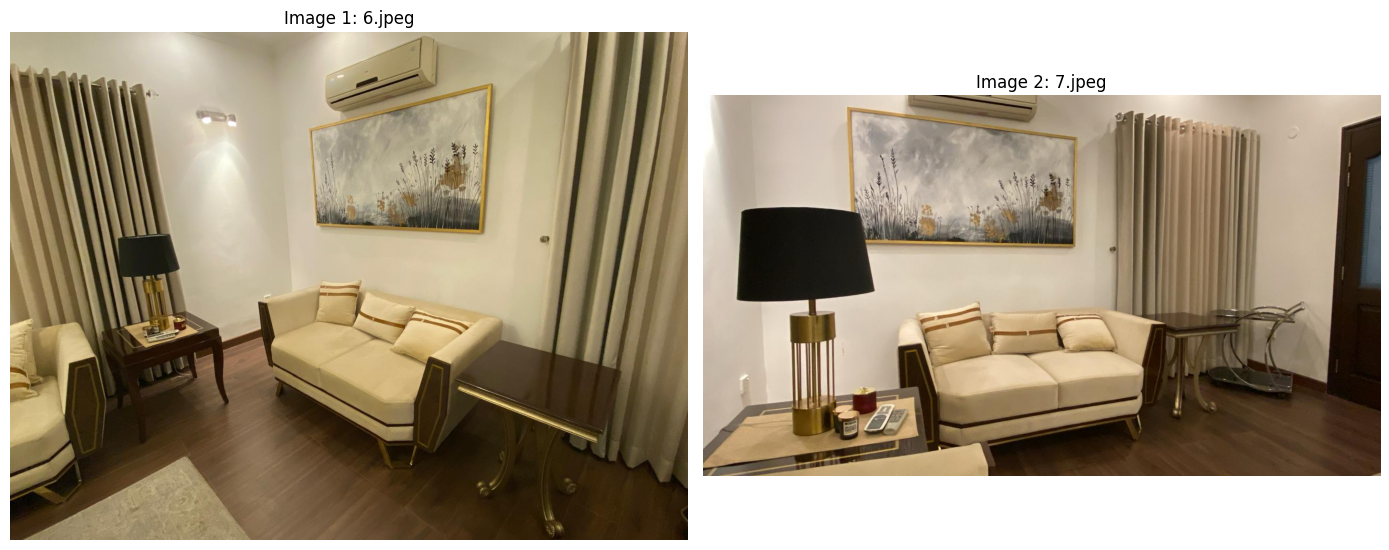

In [32]:

IMG_NAME_1 = 'photo6.jpeg'
IMG_NAME_2 = 'photo45.jpeg'

data_dir = os.path.join(module_path, 'data2')
img_path1 = os.path.join(data_dir, IMG_NAME_1)
img_path2 = os.path.join(data_dir, IMG_NAME_2)

img1 = cv2.imread(img_path1, cv2.IMREAD_COLOR)
img2 = cv2.imread(img_path2, cv2.IMREAD_COLOR)

if img1 is None or img2 is None:
    raise ValueError("Could not load images. Check file paths.")

# Convert BGR to RGB for matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Convert to grayscale for feature detection
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

print(f"Image 1 shape: {img1.shape}")
print(f"Image 2 shape: {img2.shape}")

# Display original images
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(img1_rgb)
axes[0].set_title('Image 1: 6.jpeg')
axes[0].axis('off')
axes[1].imshow(img2_rgb)
axes[1].set_title('Image 2: 7.jpeg')
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [16]:
# Cell 3: Detect SIFT features
sift = cv2.SIFT_create(nfeatures=3000)

print("Detecting features in image 1...")
kp1, des1 = sift.detectAndCompute(gray1, None)
print(f"Found {len(kp1)} keypoints in image 1")

print("Detecting features in image 2...")
kp2, des2 = sift.detectAndCompute(gray2, None)
print(f"Found {len(kp2)} keypoints in image 2")

Detecting features in image 1...
Found 1677 keypoints in image 1
Detecting features in image 2...
Found 1464 keypoints in image 2


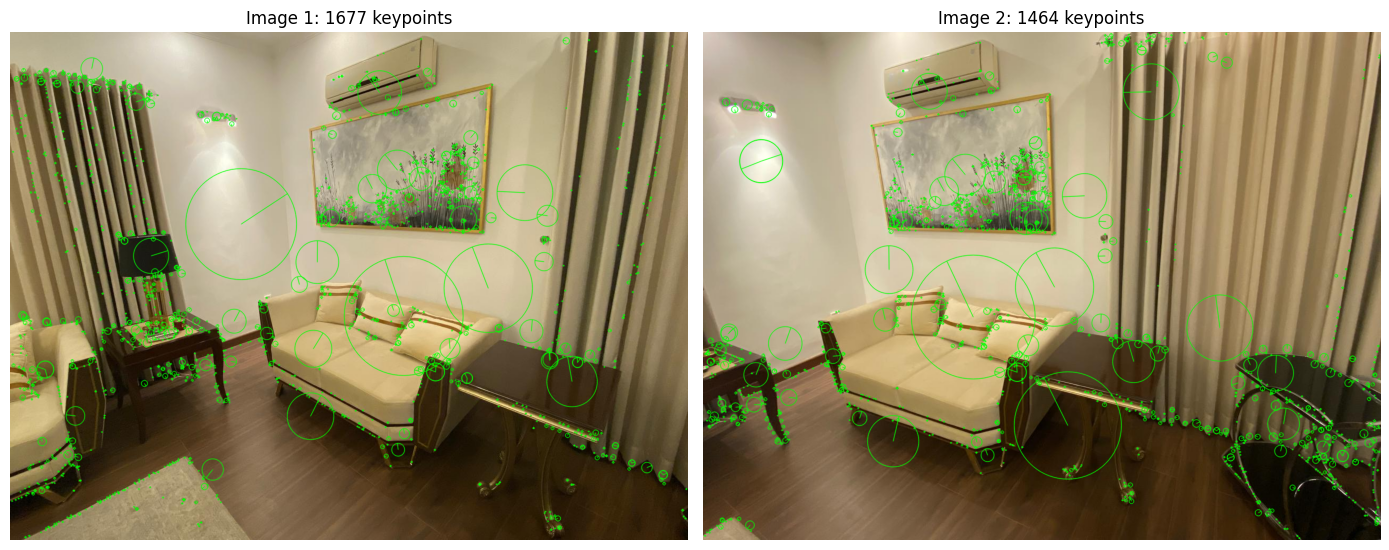

In [17]:
# Cell 4: Visualize detected keypoints
img1_kp = cv2.drawKeypoints(
    img1_rgb, kp1, None, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(0, 255, 0)
)
img2_kp = cv2.drawKeypoints(
    img2_rgb, kp2, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(0, 255, 0)
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(img1_kp)
axes[0].set_title(f'Image 1: {len(kp1)} keypoints')
axes[0].axis('off')
axes[1].imshow(img2_kp)
axes[1].set_title(f'Image 2: {len(kp2)} keypoints')
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [26]:
# Cell 5: Match features using Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

print("Matching features...")
matches = bf.knnMatch(des1, des2, k=2)
print(f"Initial matches found: {len(matches)}")

# Cell 6: Apply Lowe's ratio test
ratio_thresh = 0.75
good_matches = []

for match_pair in matches:
    if len(match_pair) == 2:
        m, n = match_pair
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)

print(f"Good matches after Lowe's ratio test (threshold={ratio_thresh}): {len(good_matches)}")
print(f"Match retention rate: {len(good_matches)/len(matches)*100:.1f}%")

# Extract matched point coordinates
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

print(f"Matched points shape: {pts1.shape}")


Matching features...
Initial matches found: 1677
Good matches after Lowe's ratio test (threshold=0.75): 412
Match retention rate: 24.6%
Matched points shape: (412, 2)


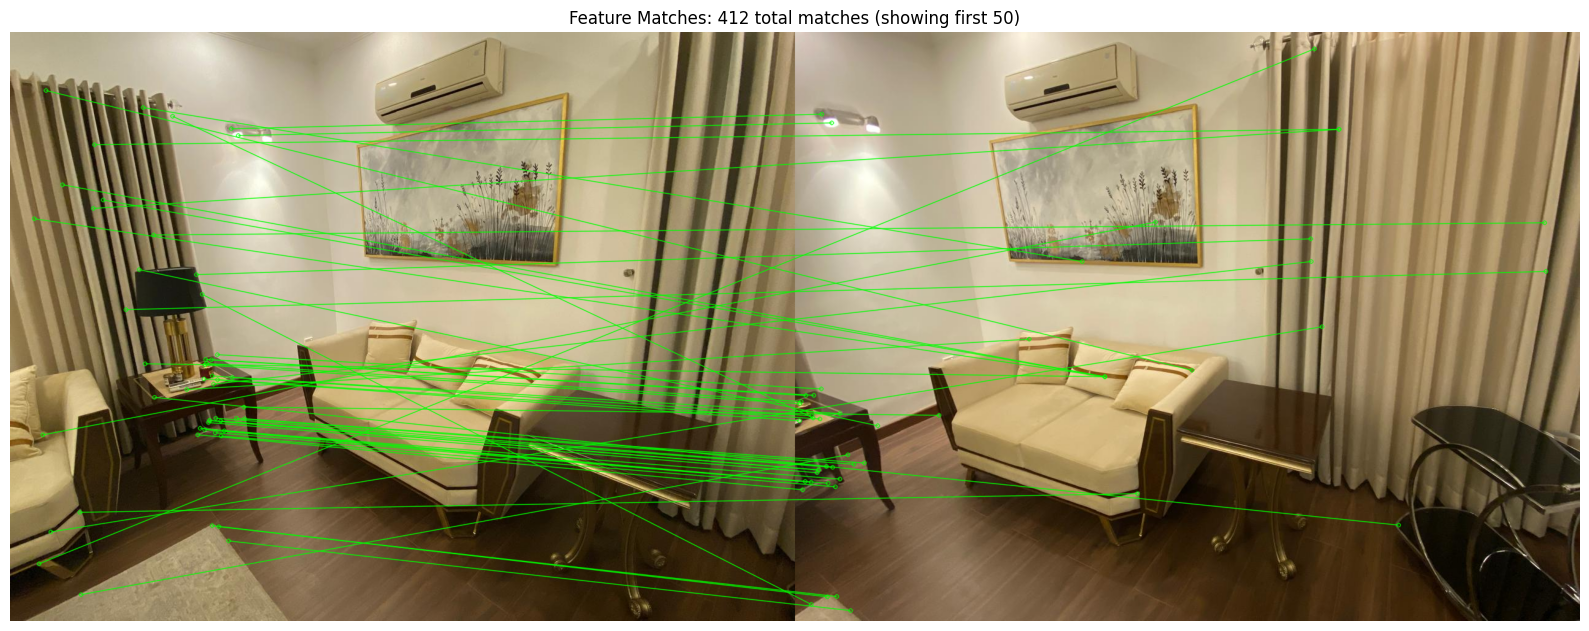

In [27]:
# Cell 7: Visualize matches
num_display = 50  # Show first 50 matches for clarity
matches_to_draw = good_matches[:num_display]

img_matches = cv2.drawMatches(
    img1_rgb, kp1, img2_rgb, kp2, matches_to_draw, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0)
)

plt.figure(figsize=(16, 8))
plt.imshow(img_matches)
plt.title(f'Feature Matches: {len(good_matches)} total matches (showing first {num_display})')
plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
# Cell 8: Summary statistics
print("\n" + "="*50)
print("WEEK 1 SUMMARY")
print("="*50)
print(f"Image 1 size: {gray1.shape[1]}x{gray1.shape[0]} pixels")
print(f"Image 2 size: {gray2.shape[1]}x{gray2.shape[0]} pixels")
print(f"\nKeypoints detected:")
print(f"  Image 1: {len(kp1)}")
print(f"  Image 2: {len(kp2)}")
print(f"\nMatching results:")
print(f"  Initial matches: {len(matches)}")
print(f"  Good matches (after ratio test): {len(good_matches)}")
print(f"  Match quality: {len(good_matches) / min(len(kp1), len(kp2)) * 100:.1f}%")
print(f"\nRatio threshold used: {ratio_thresh}")
print("="*50)

# Optional: Save matched points for Phase 1
print(f"\nMatched points saved to memory:")
print(f"  pts1.shape = {pts1.shape}")
print(f"  pts2.shape = {pts2.shape}")
print("\nThese points will be used for two-view reconstruction in Phase 1!")


WEEK 1 SUMMARY
Image 1 size: 1280x960 pixels
Image 2 size: 1280x960 pixels

Keypoints detected:
  Image 1: 1677
  Image 2: 1464

Matching results:
  Initial matches: 1677
  Good matches (after ratio test): 412
  Match quality: 28.1%

Ratio threshold used: 0.75

Matched points saved to memory:
  pts1.shape = (412, 2)
  pts2.shape = (412, 2)

These points will be used for two-view reconstruction in Phase 1!


Original Image 1 shape: (960, 1280, 3)
Original Image 2 shape: (720, 1280, 3)

Resized both images to: (720, 1280, 3)
Final Image 1 shape: (720, 1280, 3)
Final Image 2 shape: (720, 1280, 3)


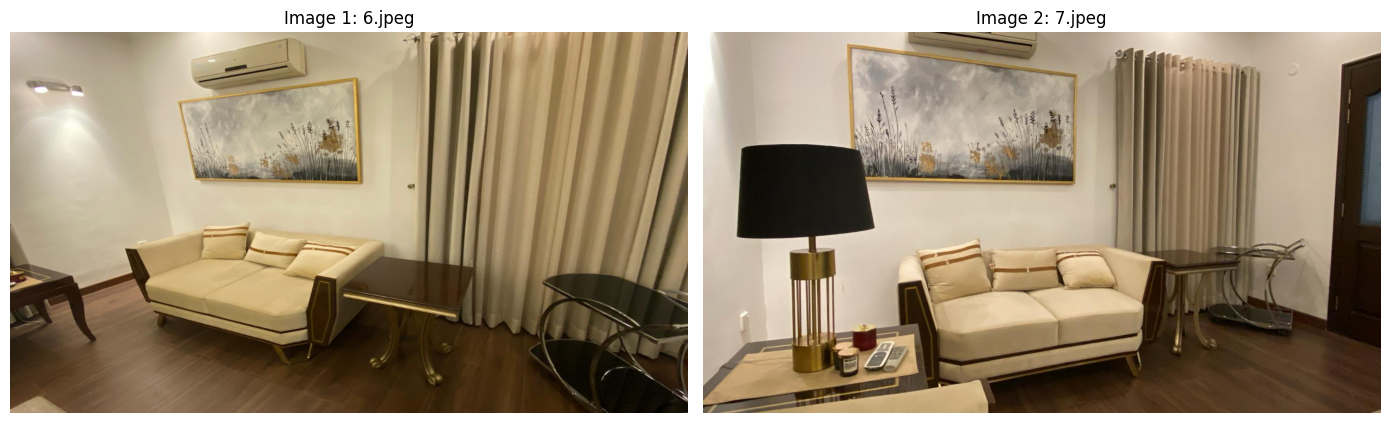

Detecting features in image 1...
Found 1528 keypoints in image 1
Detecting features in image 2...
Found 2256 keypoints in image 2


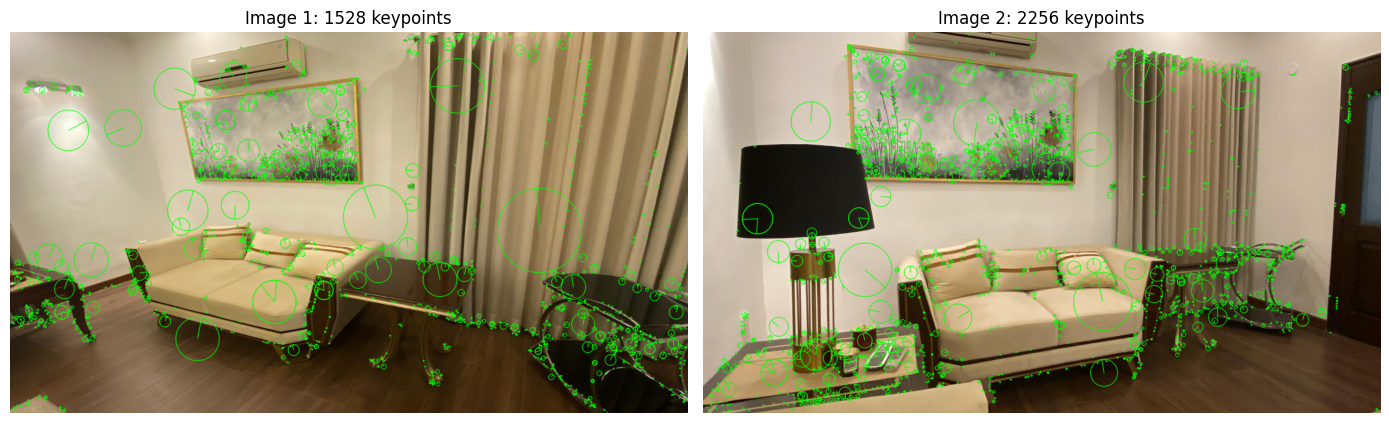

Matching features...
Initial matches found: 1528
Good matches after Lowe's ratio test (threshold=0.8): 260
Match retention rate: 17.0%
Matched points shape: (260, 2)


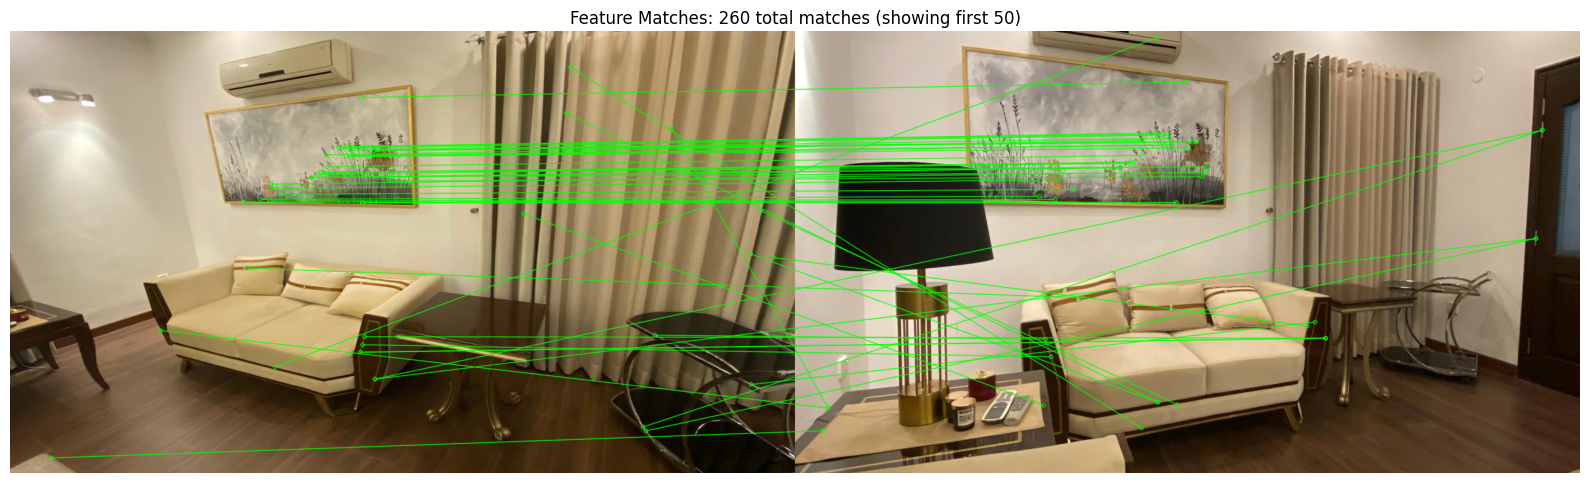


WEEK 1 SUMMARY
Image 1 size: 1280x720 pixels
Image 2 size: 1280x720 pixels

Keypoints detected:
  Image 1: 1528
  Image 2: 2256

Matching results:
  Initial matches: 1528
  Good matches (after ratio test): 260
  Match quality: 17.0%

Ratio threshold used: 0.8

Matched points saved to memory:
  pts1.shape = (260, 2)
  pts2.shape = (260, 2)

These points will be used for two-view reconstruction in Phase 1!


In [37]:
# Week 1: Feature Detection & Matching for Structure from Motion
# Run each cell sequentially in your Jupyter notebook

# Cell 1: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Cell 2: Load images
IMG_NAME_1 = 'photo7.jpeg'
IMG_NAME_2 = 'photo45.jpeg'

data_dir = os.path.join(module_path, 'data2')
img_path1 = os.path.join(data_dir, IMG_NAME_1)
img_path2 = os.path.join(data_dir, IMG_NAME_2)

img1 = cv2.imread(img_path1, cv2.IMREAD_COLOR)
img2 = cv2.imread(img_path2, cv2.IMREAD_COLOR)

if img1 is None or img2 is None:
    raise ValueError("Could not load images. Check file paths.")

print(f"Original Image 1 shape: {img1.shape}")
print(f"Original Image 2 shape: {img2.shape}")

# Resize images to same dimensions if needed
if img1.shape != img2.shape:
    print("\nWarning: Images have different dimensions. Resizing...")
    # Resize to the smaller dimension to avoid upscaling
    target_height = min(img1.shape[0], img2.shape[0])
    target_width = min(img1.shape[1], img2.shape[1])
    
    img1 = cv2.resize(img1, (target_width, target_height))
    img2 = cv2.resize(img2, (target_width, target_height))
    print(f"Resized both images to: {img1.shape}")

# Convert BGR to RGB for matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Convert to grayscale for feature detection
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

print(f"Final Image 1 shape: {img1.shape}")
print(f"Final Image 2 shape: {img2.shape}")

# Display original images
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(img1_rgb)
axes[0].set_title('Image 1: 6.jpeg')
axes[0].axis('off')
axes[1].imshow(img2_rgb)
axes[1].set_title('Image 2: 7.jpeg')
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Cell 3: Detect SIFT features
sift = cv2.SIFT_create(
    nfeatures=5000,  # Increased from 3000
    contrastThreshold=0.03,  # Lower = more features (default 0.04)
    edgeThreshold=10,  # Default is 10
    sigma=1.6  # Default is 1.6
)

print("Detecting features in image 1...")
kp1, des1 = sift.detectAndCompute(gray1, None)
print(f"Found {len(kp1)} keypoints in image 1")

print("Detecting features in image 2...")
kp2, des2 = sift.detectAndCompute(gray2, None)
print(f"Found {len(kp2)} keypoints in image 2")

# Cell 4: Visualize detected keypoints
img1_kp = cv2.drawKeypoints(
    img1_rgb, kp1, None, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(0, 255, 0)
)
img2_kp = cv2.drawKeypoints(
    img2_rgb, kp2, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(0, 255, 0)
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(img1_kp)
axes[0].set_title(f'Image 1: {len(kp1)} keypoints')
axes[0].axis('off')
axes[1].imshow(img2_kp)
axes[1].set_title(f'Image 2: {len(kp2)} keypoints')
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Cell 5: Match features using Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

print("Matching features...")
matches = bf.knnMatch(des1, des2, k=2)
print(f"Initial matches found: {len(matches)}")

# Cell 6: Apply Lowe's ratio test
ratio_thresh = 0.8  # Increased from 0.75 for more matches
good_matches = []

for match_pair in matches:
    if len(match_pair) == 2:
        m, n = match_pair
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)

# Sort matches by distance (lower distance = better match)
good_matches = sorted(good_matches, key=lambda x: x.distance)

print(f"Good matches after Lowe's ratio test (threshold={ratio_thresh}): {len(good_matches)}")
print(f"Match retention rate: {len(good_matches)/len(matches)*100:.1f}%")

# Extract matched point coordinates
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

print(f"Matched points shape: {pts1.shape}")

# Cell 7: Visualize matches
num_display = 50  # Show first 50 matches for clarity
matches_to_draw = good_matches
matches_to_draw = good_matches[:num_display]

img_matches = cv2.drawMatches(
    img1_rgb, kp1, img2_rgb, kp2, matches_to_draw, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0)
)

plt.figure(figsize=(16, 8))
plt.imshow(img_matches)
plt.title(f'Feature Matches: {len(good_matches)} total matches)')
plt.title(f'Feature Matches: {len(good_matches)} total matches (showing first {num_display})')
plt.axis('off')
plt.tight_layout()
plt.show()

# Cell 8: Summary statistics
print("\n" + "="*50)
print("WEEK 1 SUMMARY")
print("="*50)
print(f"Image 1 size: {gray1.shape[1]}x{gray1.shape[0]} pixels")
print(f"Image 2 size: {gray2.shape[1]}x{gray2.shape[0]} pixels")
print(f"\nKeypoints detected:")
print(f"  Image 1: {len(kp1)}")
print(f"  Image 2: {len(kp2)}")
print(f"\nMatching results:")
print(f"  Initial matches: {len(matches)}")
print(f"  Good matches (after ratio test): {len(good_matches)}")
print(f"  Match quality: {len(good_matches) / min(len(kp1), len(kp2)) * 100:.1f}%")
print(f"\nRatio threshold used: {ratio_thresh}")
print("="*50)

# Optional: Save matched points for Phase 1
print(f"\nMatched points saved to memory:")
print(f"  pts1.shape = {pts1.shape}")
print(f"  pts2.shape = {pts2.shape}")
print("\nThese points will be used for two-view reconstruction in Phase 1!")